# Section 1: MLP Model Implementation & Experiment Tracking


## 1. Implement a Multi-Layer Perceptron (MLP) Using the Iris Dataset

In [1]:
# # Login to wandb account using api key
# import wandb
# wandb.login(key="")

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import wandb
import io
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Initialize W&B
wandb.init(project="mlp-iris-experiment")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: jenil-patel910 (jenil-patel910-indian-institute-of-technology-gandhinagar). Use `wandb login --relogin` to force relogin


In [3]:
# Load and preprocess Iris dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

In [4]:

# One-hot encode labels
ohe = OneHotEncoder(sparse_output=False)
y = ohe.fit_transform(y)

In [5]:
# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)


In [ ]:
# Normalize features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## 2. Define and Train the MLP Model

In [7]:
# Define MLP model (Task 2)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

c:\Users\JENIL\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Capture model summary as a string
model_summary = io.StringIO()
model.summary(print_fn=lambda x: model_summary.write(x + "\n"))
wandb.log({"model_architecture": model_summary.getvalue()})

In [12]:
# Train model with tracking
from wandb.integration.keras import WandbMetricsLogger

history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    batch_size=32, epochs=50, verbose=1,
                    callbacks=[WandbMetricsLogger()])


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8125 - loss: 0.785 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - accuracy: 0.6959 - loss: 0.9155 - val_accuracy: 0.8667 - val_loss: 0.6123
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6562 - loss: 0.975 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6365 - loss: 0.9789 - val_accuracy: 0.8667 - val_loss: 0.5959
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5312 - loss: 1.102 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6104 - loss: 0.9743 - val_accuracy: 0.8667 - val_loss: 0.5803
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6250 - loss: 0.867 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6511 - loss: 0.8886 - val_accuracy: 0.8667 - val_loss: 0.5651
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5000 - loss: 1.060 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6042 - loss: 0.9381 - val_accuracy: 0.8667 - val_loss: 0.5500
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58

## 3. Evaluate Model Performance

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/ste ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


accuracy,▁
epoch/accuracy,▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▇▇▇▇▇██████
epoch/epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,██▇▇▇▆▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁
epoch/val_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁██████████████
epoch/val_loss,██▇▇▇▆▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.83333


Accuracy: 0.8333333333333334, Precision: 0.9027777777777779, Recall: 0.8333333333333334, F1 Score: 0.8307533539731683


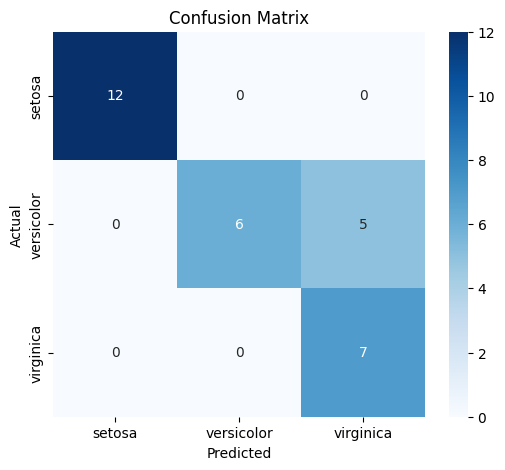

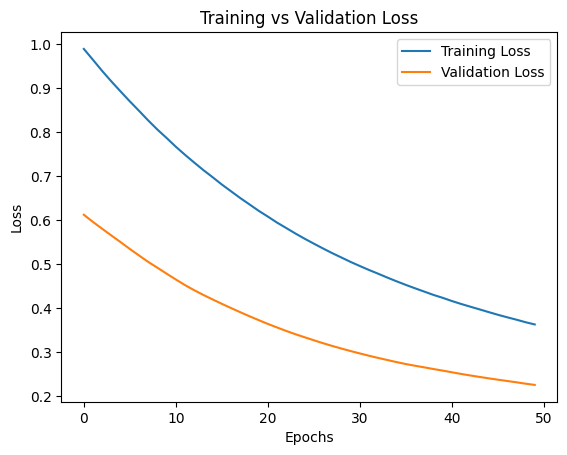

In [ ]:
# Evaluate model
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred)

# Log metrics to W&B
wandb.log({"accuracy": accuracy, "precision": precision, "recall": recall, "f1_score": f1})

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
wandb.log({"confusion_matrix": wandb.Image("confusion_matrix.png")})

# Plot loss curves
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.savefig("loss_curve.png")
wandb.log({"loss_curve": wandb.Image("loss_curve.png")})

wandb.finish()
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


# Section 2: Hyperparameters


## Task 1: Hyperparameter Optimization

d:\mtech\stai\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Batch Size: 2, Learning Rate: 0.001, Epochs: 1
Accuracy: 0.3000, F1 Score: 0.2047


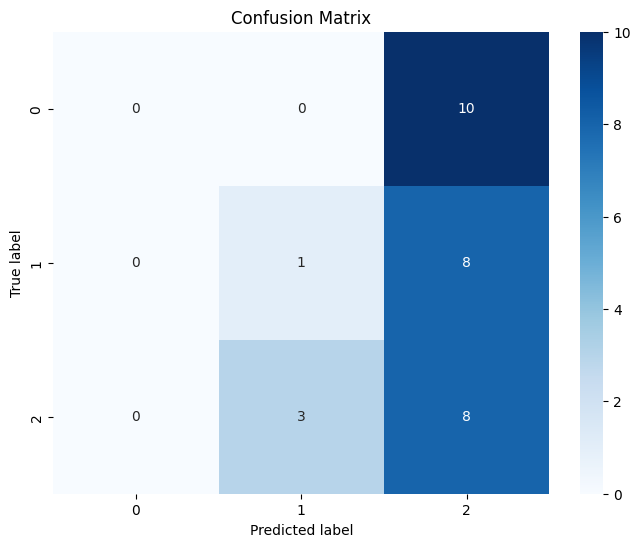

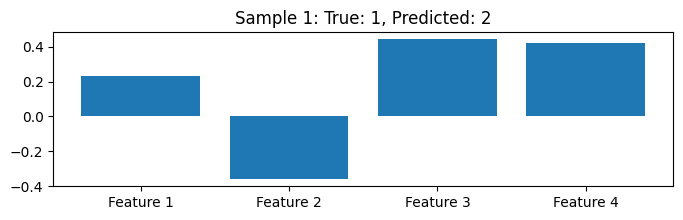

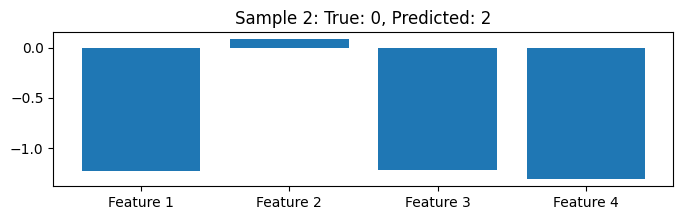

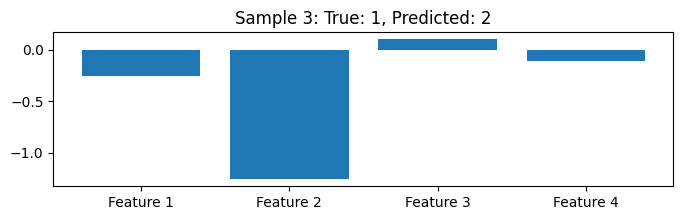

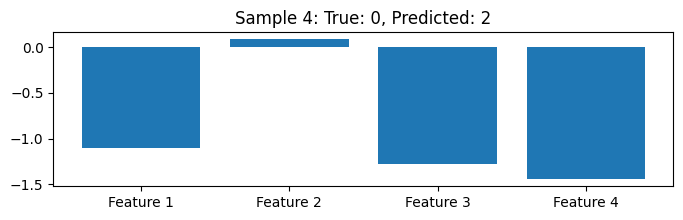

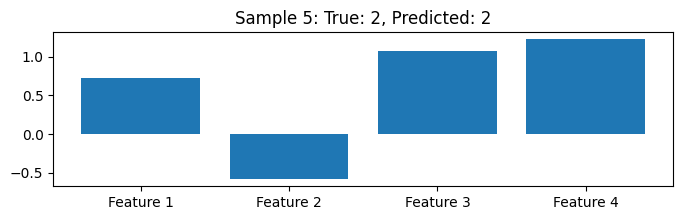

d:\mtech\stai\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
Batch Size: 2, Learning Rate: 0.001, Epochs: 3
Accuracy: 0.8667, F1 Score: 0.8579


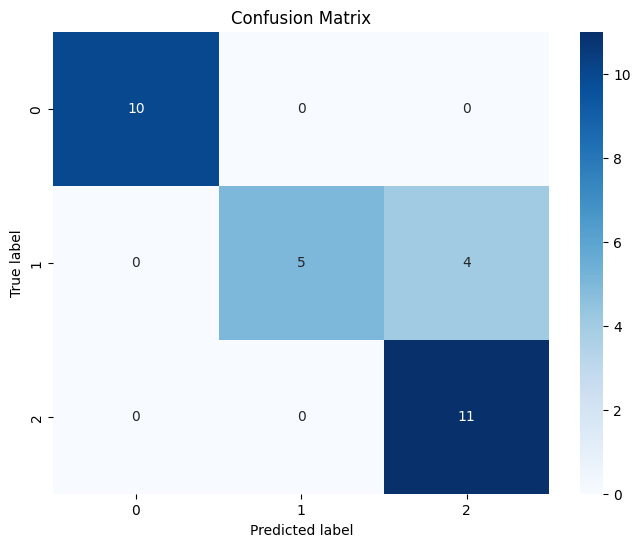

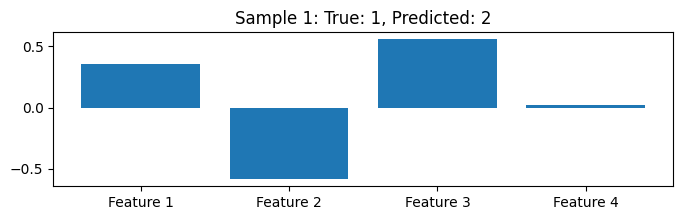

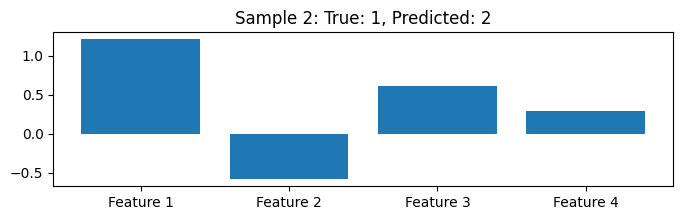

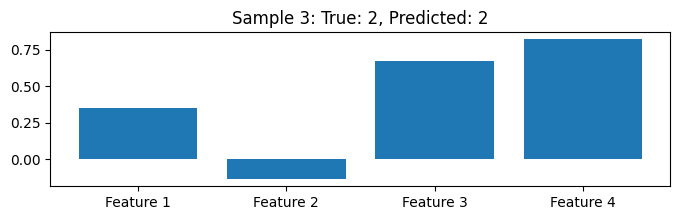

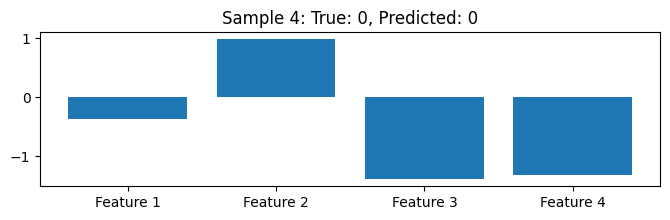

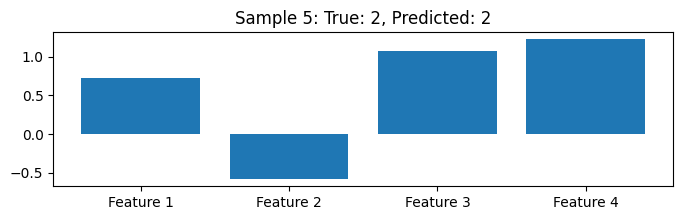

d:\mtech\stai\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Batch Size: 2, Learning Rate: 0.001, Epochs: 5
Accuracy: 0.9000, F1 Score: 0.8960


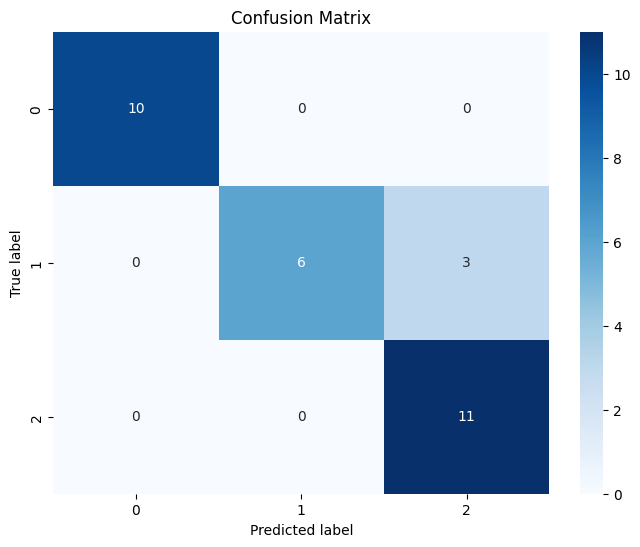

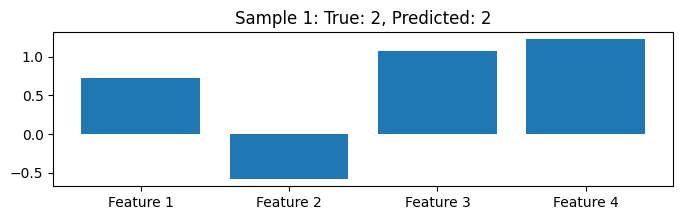

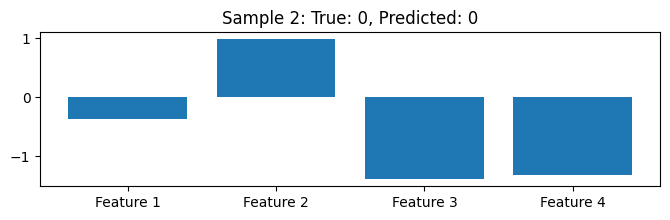

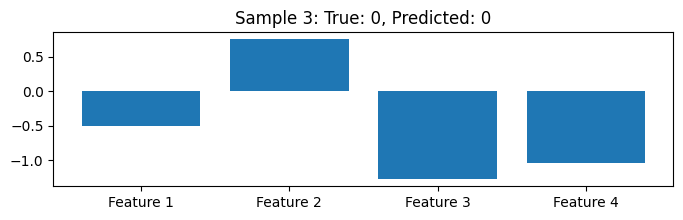

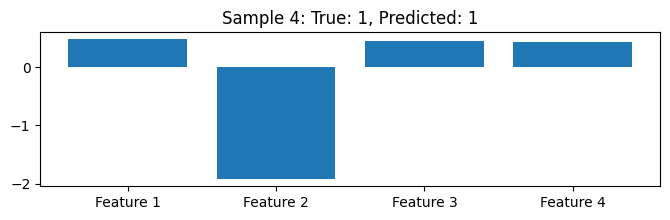

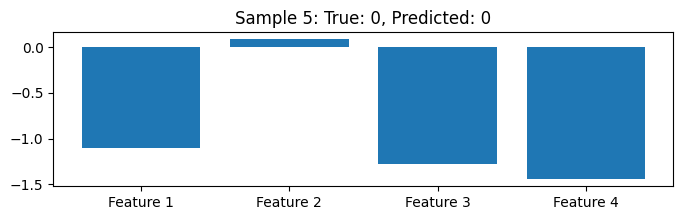

d:\mtech\stai\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Batch Size: 2, Learning Rate: 1e-05, Epochs: 1
Accuracy: 0.4333, F1 Score: 0.3179


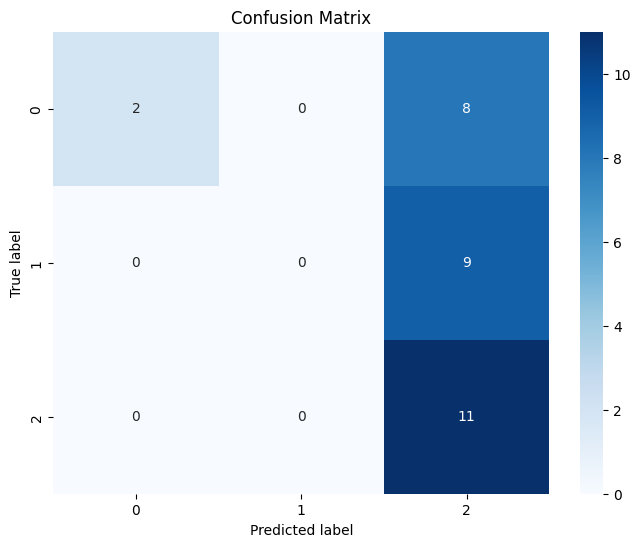

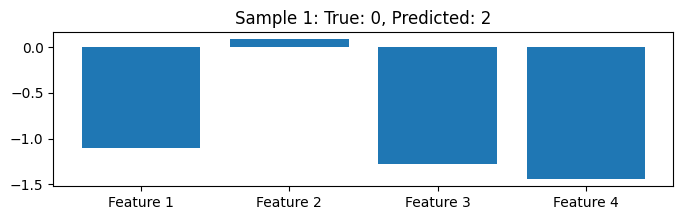

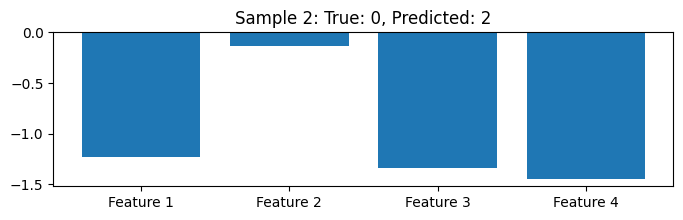

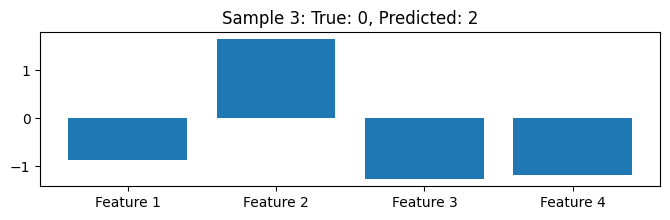

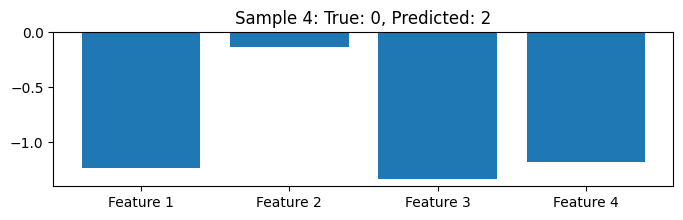

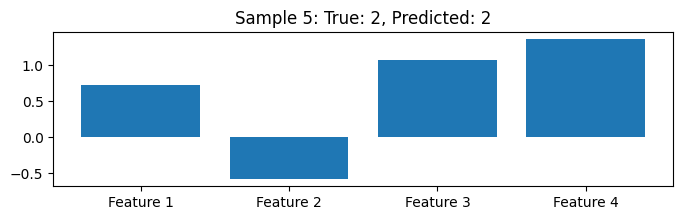

d:\mtech\stai\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Batch Size: 2, Learning Rate: 1e-05, Epochs: 3
Accuracy: 0.4000, F1 Score: 0.3323


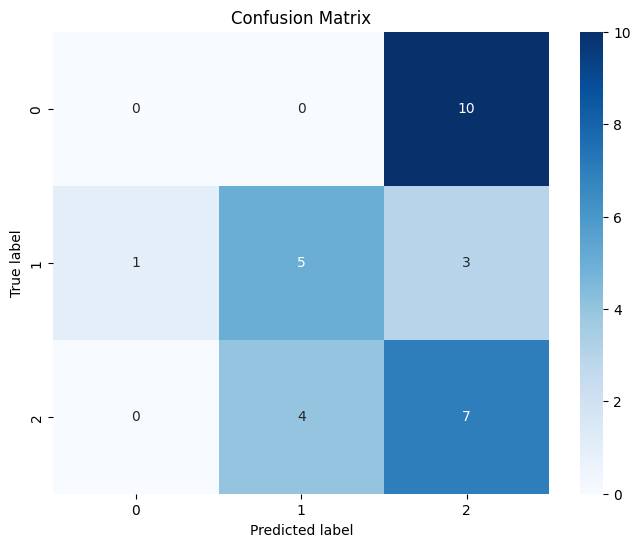

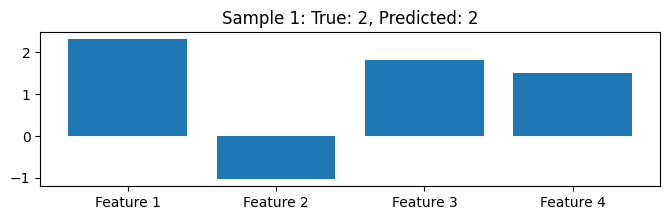

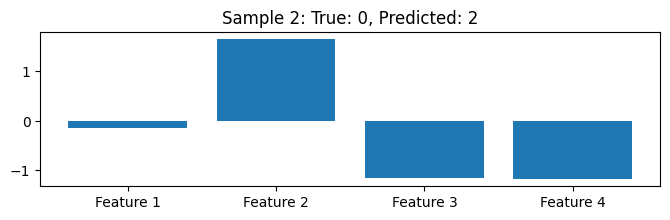

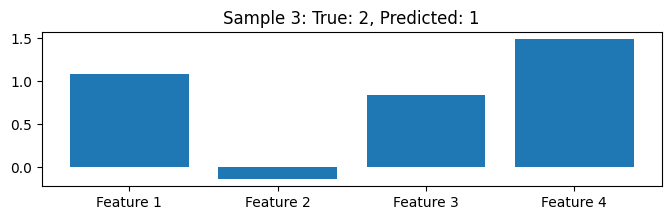

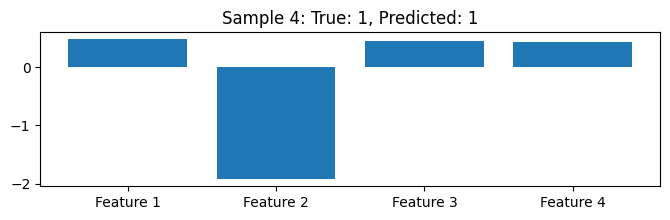

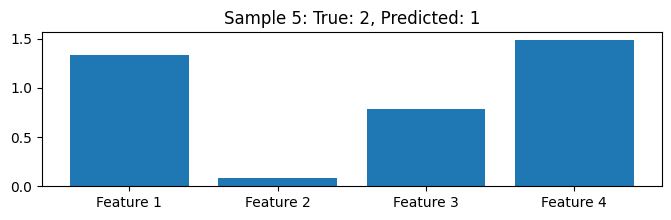

d:\mtech\stai\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Batch Size: 2, Learning Rate: 1e-05, Epochs: 5
Accuracy: 0.5667, F1 Score: 0.4543


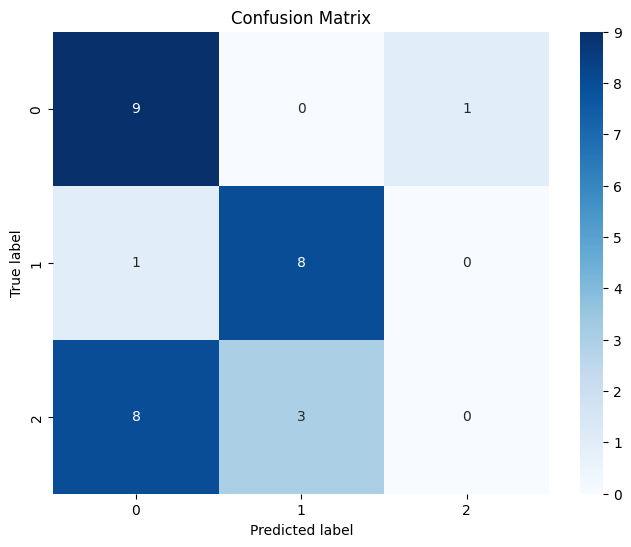

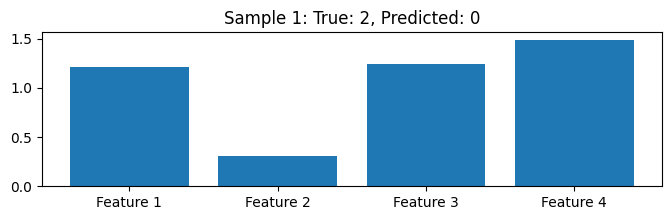

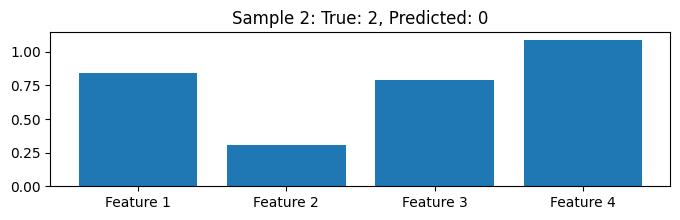

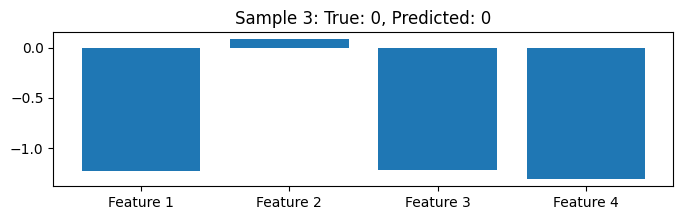

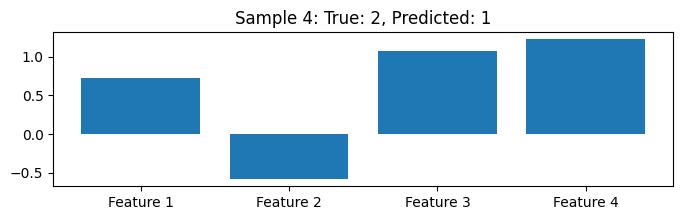

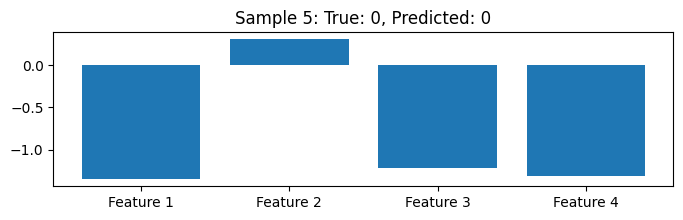

d:\mtech\stai\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Batch Size: 4, Learning Rate: 0.001, Epochs: 1
Accuracy: 0.4000, F1 Score: 0.3399


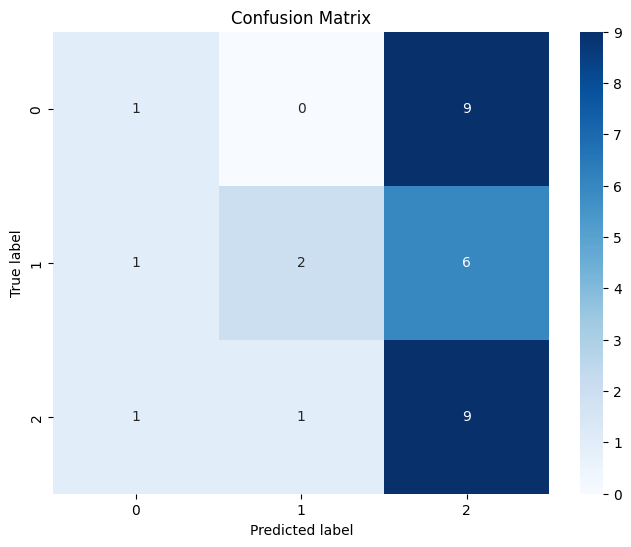

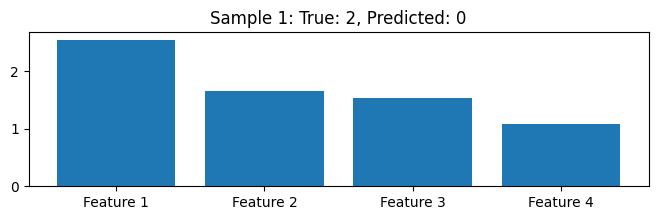

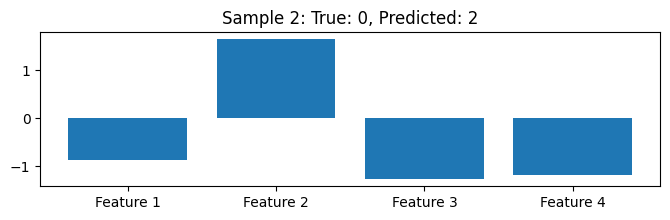

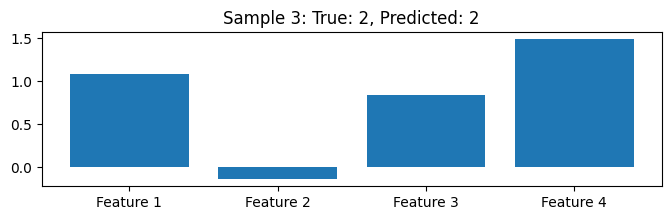

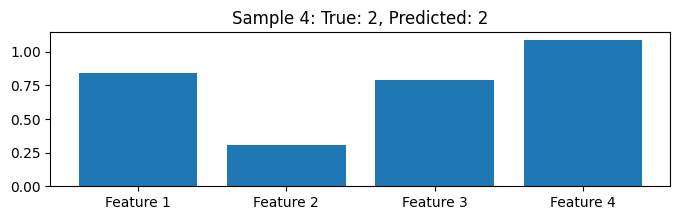

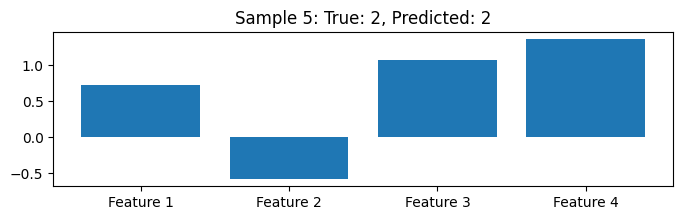

d:\mtech\stai\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Batch Size: 4, Learning Rate: 0.001, Epochs: 3
Accuracy: 0.8667, F1 Score: 0.8667


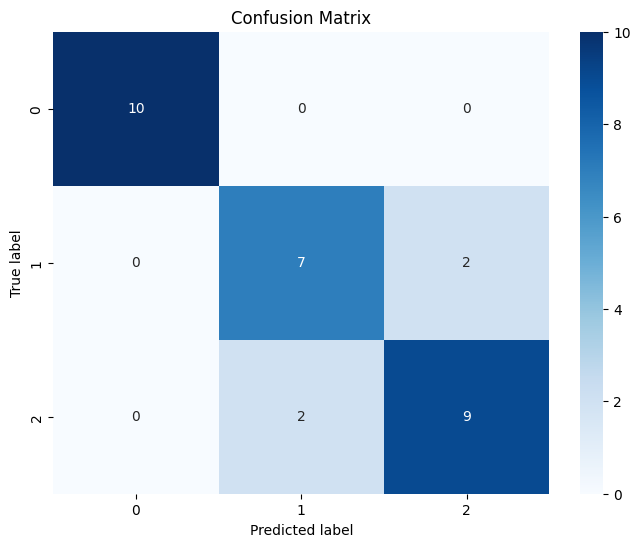

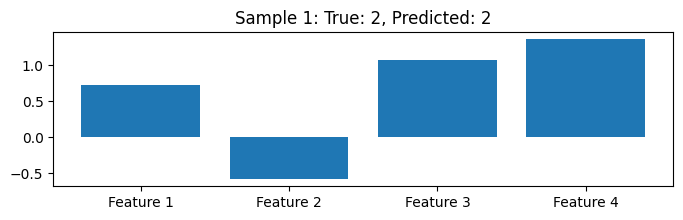

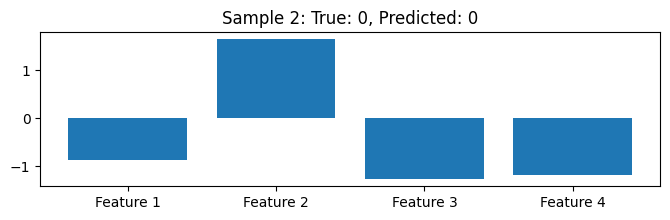

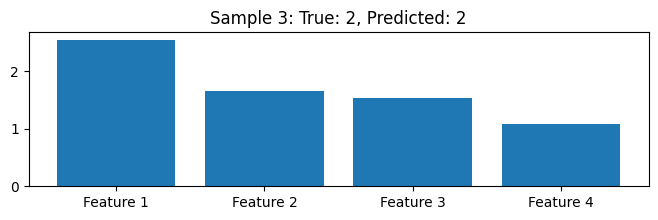

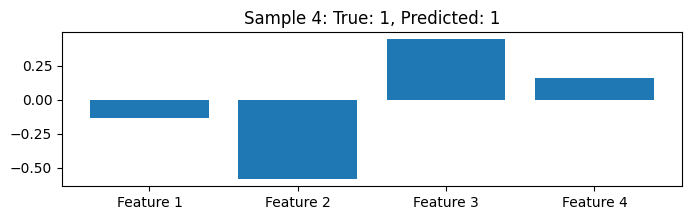

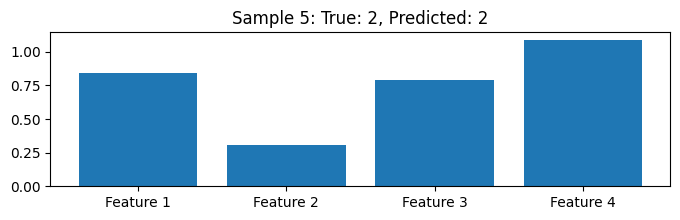

d:\mtech\stai\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Batch Size: 4, Learning Rate: 0.001, Epochs: 5
Accuracy: 0.8667, F1 Score: 0.8639


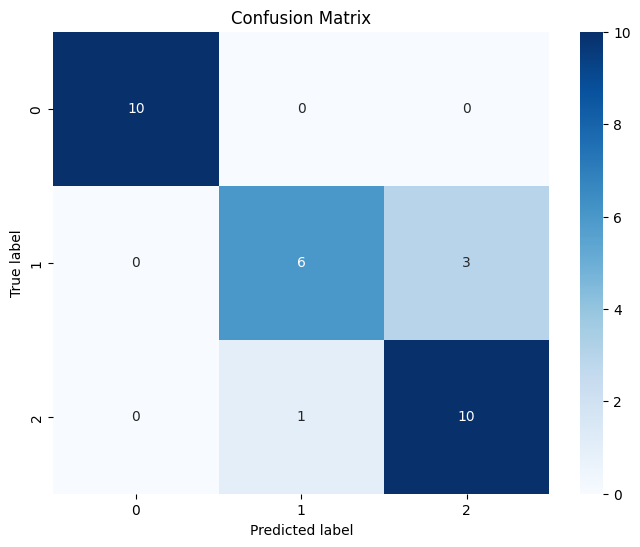

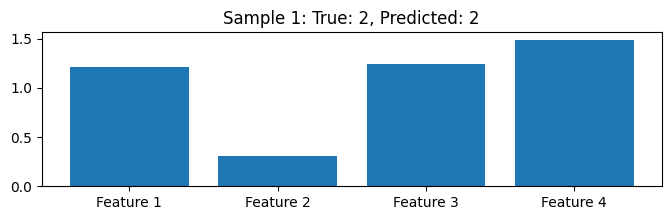

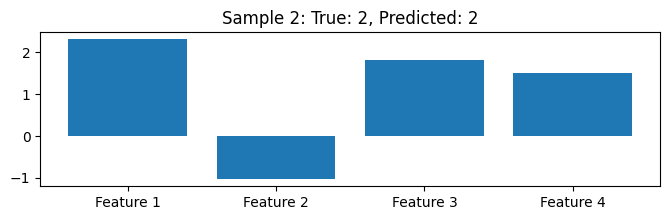

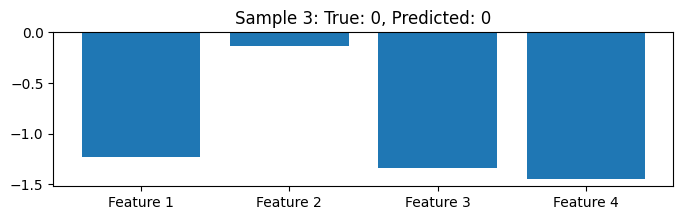

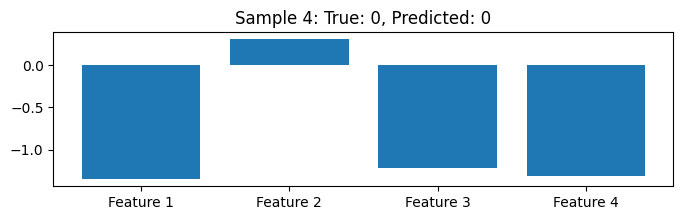

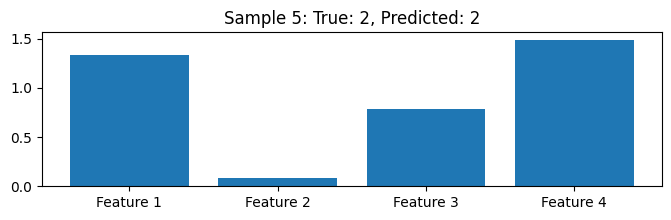

d:\mtech\stai\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Batch Size: 4, Learning Rate: 1e-05, Epochs: 1
Accuracy: 0.5333, F1 Score: 0.4292


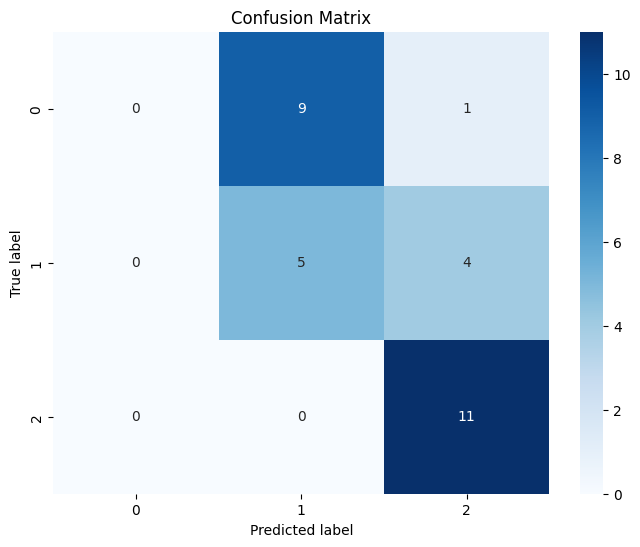

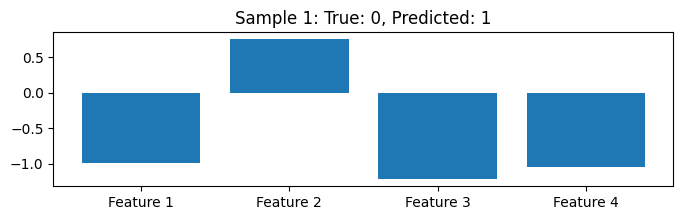

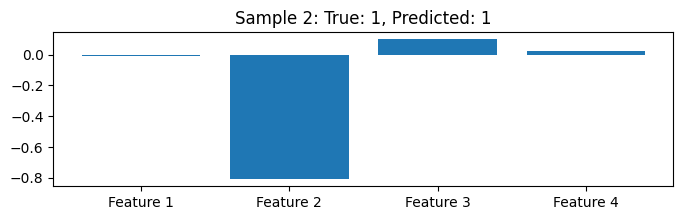

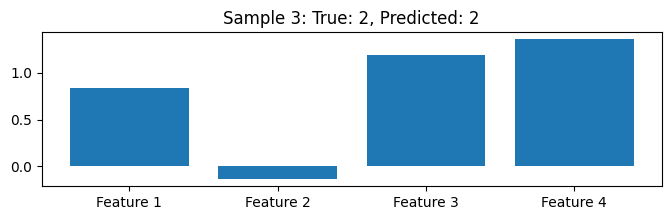

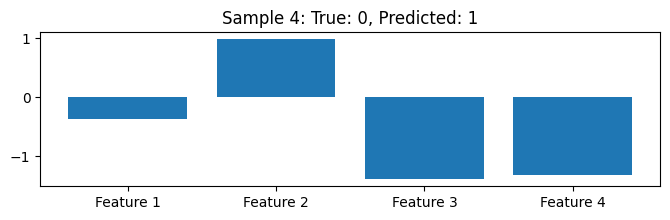

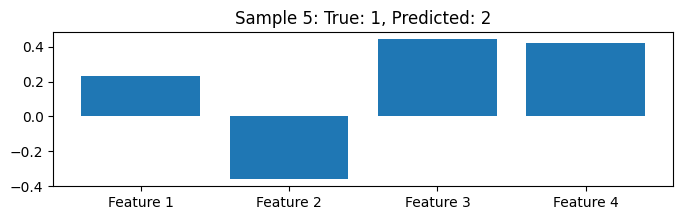

d:\mtech\stai\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Batch Size: 4, Learning Rate: 1e-05, Epochs: 3
Accuracy: 0.5333, F1 Score: 0.4563


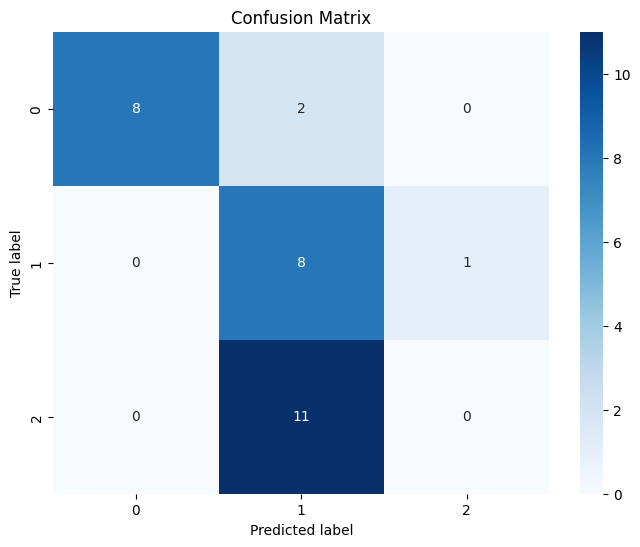

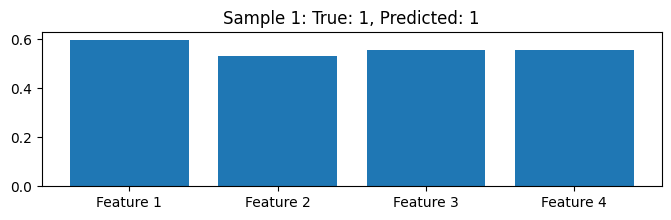

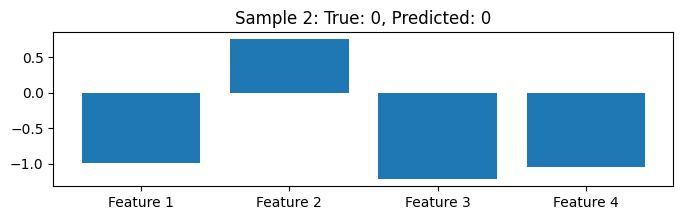

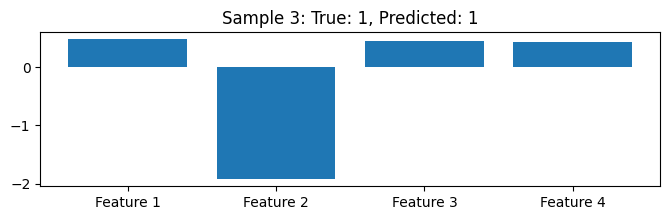

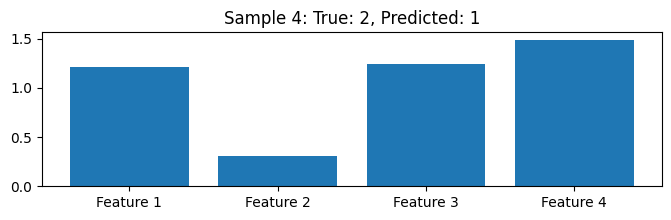

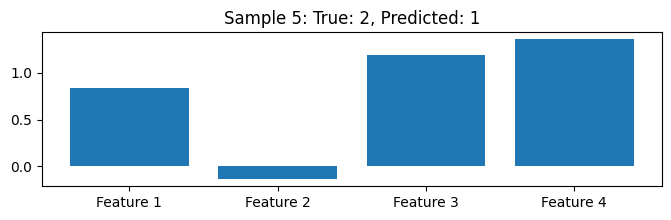

d:\mtech\stai\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Batch Size: 4, Learning Rate: 1e-05, Epochs: 5
Accuracy: 0.3667, F1 Score: 0.1967


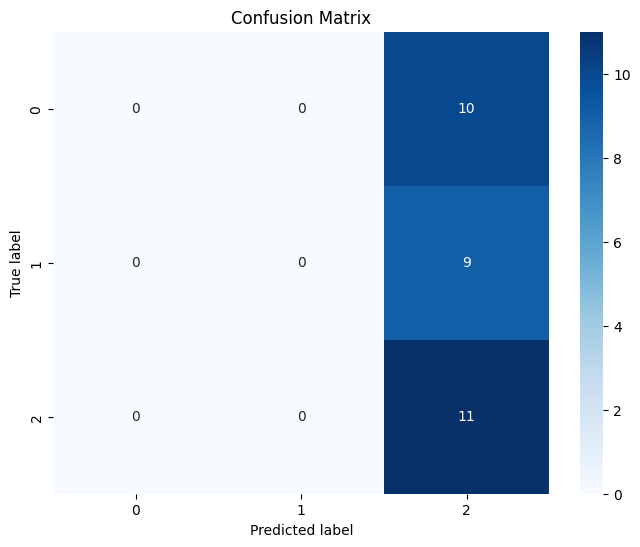

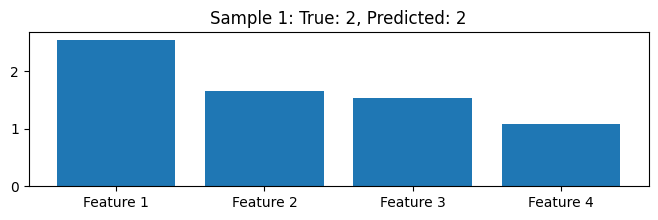

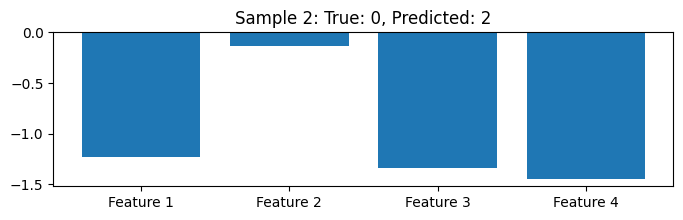

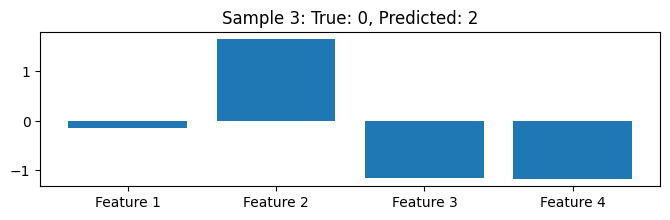

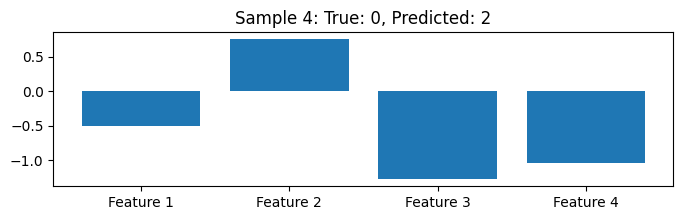

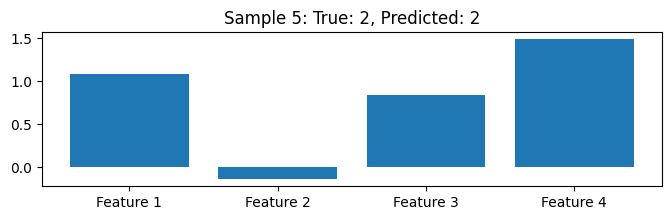

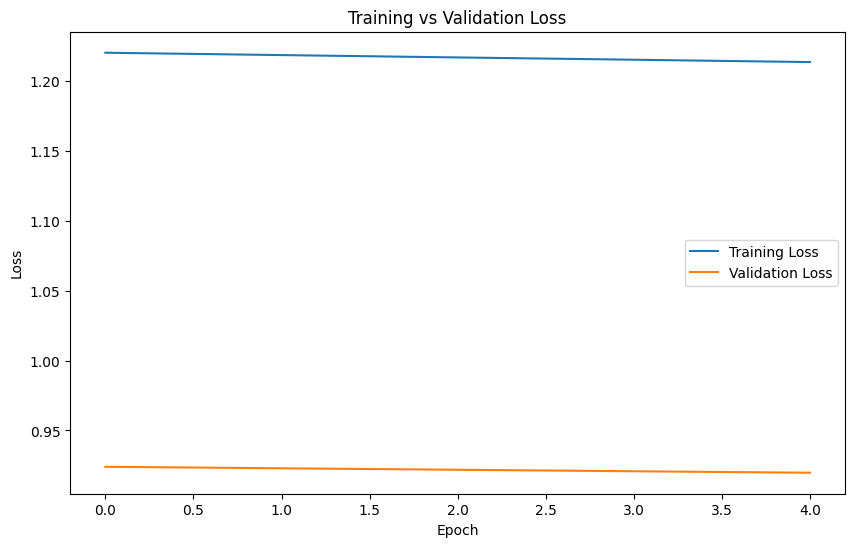

Reloading Tuner from my_dir\iris_tuning\tuner0.json
The optimal learning rate is: 0.001
The optimal batch size is: 4
Epoch 1/50


d:\mtech\stai\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 299ms/step - accuracy: 0.2448 - loss: 1.3236 - val_accuracy: 0.2083 - val_loss: 1.3056
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.2526 - loss: 1.3001 - val_accuracy: 0.1667 - val_loss: 1.2797
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.2448 - loss: 1.2741 - val_accuracy: 0.1667 - val_loss: 1.2542
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.2734 - loss: 1.2391 - val_accuracy: 0.1667 - val_loss: 1.2306
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.2109 - loss: 1.2400 - val_accuracy: 0.1667 - val_loss: 1.2073
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.2695 - loss: 1.2009 - val_accuracy: 0.1667 - val_loss: 1.1860
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.2604 - loss: 1.1802 - val_accuracy: 0.1667 - val_loss: 1.1650
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.2591 - loss: 1.1654 - val_accuracy: 0.1667 - val_loss: 1.1452
Epoc

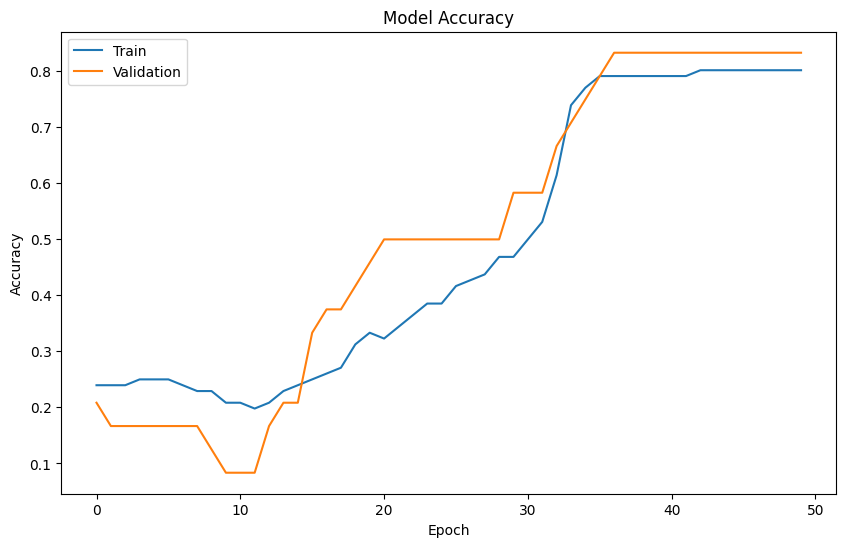

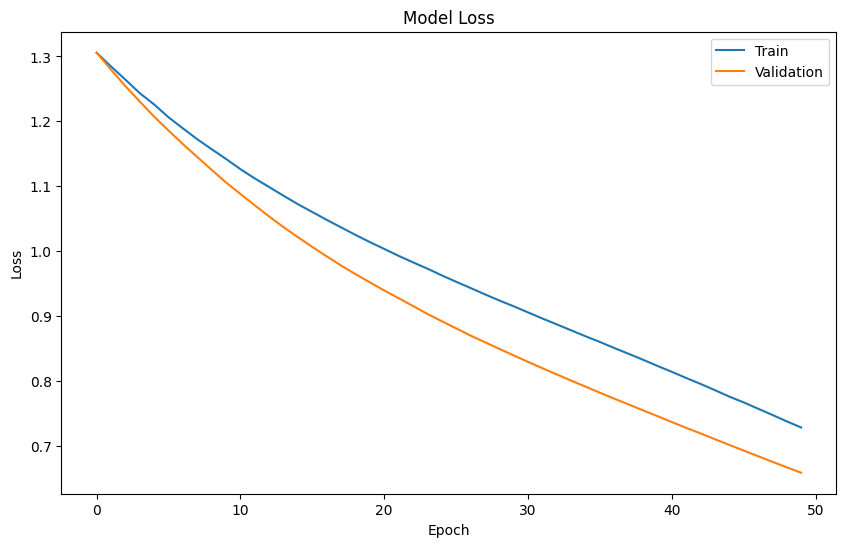

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to train and evaluate model
def train_and_evaluate(X_train, y_train, X_test, y_test, batch_size, learning_rate, epochs):
    model = Sequential([
        Dense(16, activation='relu', input_shape=(4,)),
        Dense(3, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=0)
    
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    
    return model, history, accuracy, f1, y_pred_classes, y_true_classes

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Function to plot sample predictions
def plot_samples(X_test, y_true, y_pred, n_samples=5):
    indices = np.random.choice(len(X_test), n_samples, replace=False)
    for i, idx in enumerate(indices):
        plt.figure(figsize=(8, 2))
        plt.bar(range(4), X_test[idx])
        plt.title(f"Sample {i+1}: True: {y_true[idx]}, Predicted: {y_pred[idx]}")
        plt.xticks(range(4), ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'])
        plt.show()

# Hyperparameter tuning
batch_sizes = [2, 4]
learning_rates = [1e-3, 1e-5]
epochs_list = [1, 3, 5]
results = []

X_train_scaled = X_train + X_val
X_test_scaled = X_test

for batch_size in batch_sizes:
    for lr in learning_rates:
        for epochs in epochs_list:
            model, history, accuracy, f1, y_pred, y_true = train_and_evaluate(X_train_scaled, y_train, X_test_scaled, y_test, batch_size, lr, epochs)
            results.append({
                'batch_size': batch_size,
                'learning_rate': lr,
                'epochs': epochs,
                'accuracy': accuracy,
                'f1': f1
            })
            
            print(f"Batch Size: {batch_size}, Learning Rate: {lr}, Epochs: {epochs}")
            print(f"Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
            
            plot_confusion_matrix(y_true, y_pred)
            plot_samples(X_test_scaled, y_true, y_pred)

# Plot training vs validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Keras Tuner function
def model_builder(hp):
    model = Sequential([
        Dense(16, activation='relu', input_shape=(4,)),
        Dense(3, activation='softmax')
    ])
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-5])
    hp_batch_size = hp.Choice('batch_size', values=[2, 4])
    
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=5,
                     factor=3,
                     directory='my_dir',
                     project_name='iris_tuning')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(X_train_scaled, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"The optimal learning rate is: {best_hps.get('learning_rate')}")
print(f"The optimal batch size is: {best_hps.get('batch_size')}")

# Train model with best hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print('Test accuracy:', test_acc)

# Plot training vs validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

# Plot training vs validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()


## Task 2: Automated Hyperparameter Search

d:\mtech\stai\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


d:\mtech\stai\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


d:\mtech\stai\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


d:\mtech\stai\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


d:\mtech\stai\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


d:\mtech\stai\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


d:\mtech\stai\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


d:\mtech\stai\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


d:\mtech\stai\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


d:\mtech\stai\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


d:\mtech\stai\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


d:\mtech\stai\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


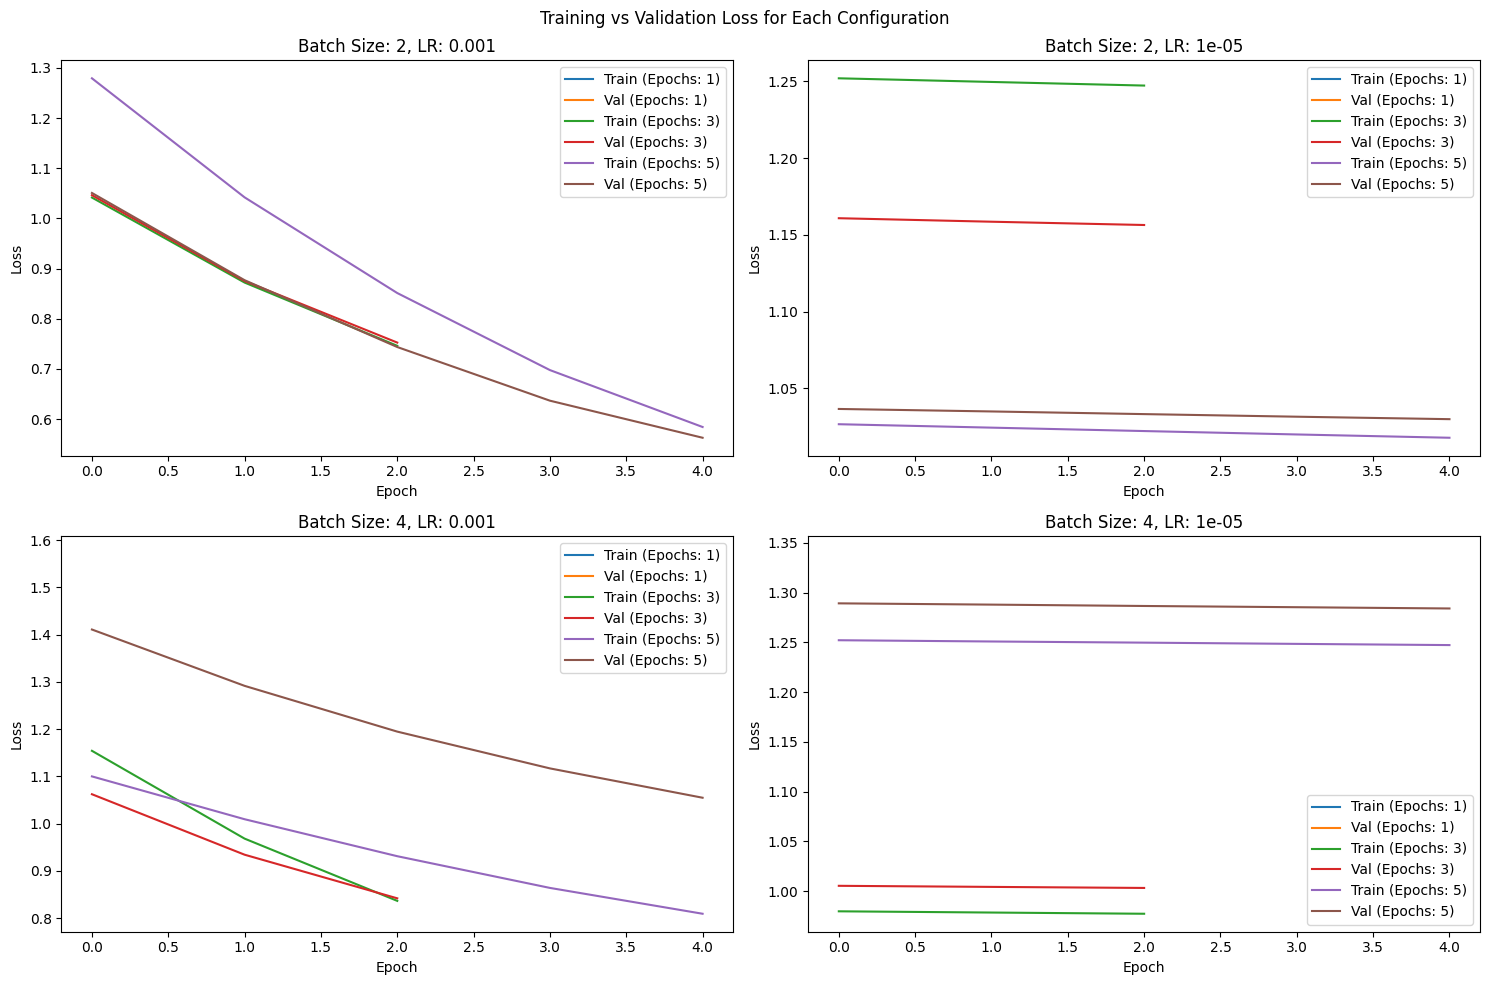

No path specified. Models will be saved in: "AutogluonModels\ag-20250222_084750"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          8
Memory Avail:       1.17 GB / 7.83 GB (15.0%)
Disk Space Avail:   48.19 GB / 59.44 GB (81.1%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         : St

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val eval_metric  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       KNeighborsDist   0.958333    accuracy       0.026044  0.011170                0.026044           0.011170            1       True          2
1  WeightedEnsemble_L2   0.958333    accuracy       0.026161  0.084341                0.000000           0.069941            2       True          7
2       KNeighborsUnif   0.958333    accuracy       0.026161  0.014400                0.026161           0.014400            1       True          1
3     RandomForestEntr   0.958333    accuracy       0.105003  2.320193                0.105003           2.320193            1       True          4
4     RandomForestGini   0.958333    accuracy       0.150230  1.569459                0.150230           1.569459            1       True          3
5       ExtraTreesGini   0.958333    accurac

d:\mtech\stai\.venv\Lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


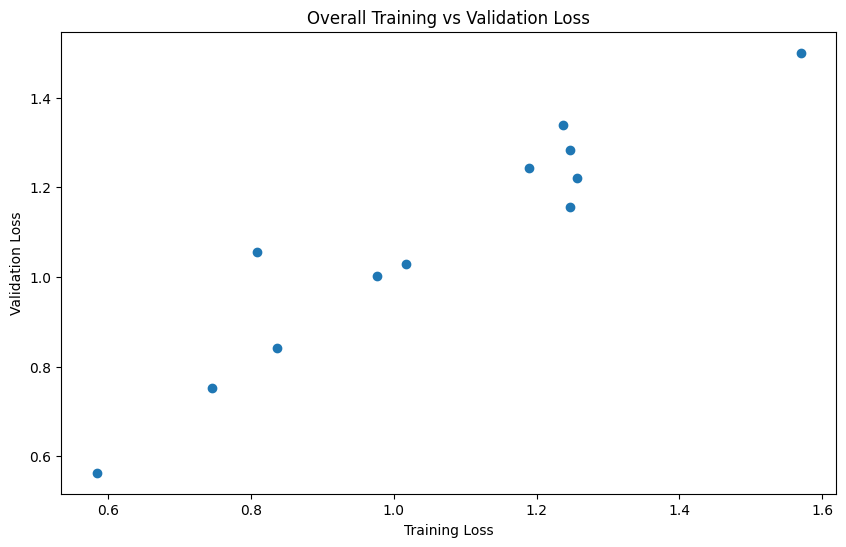

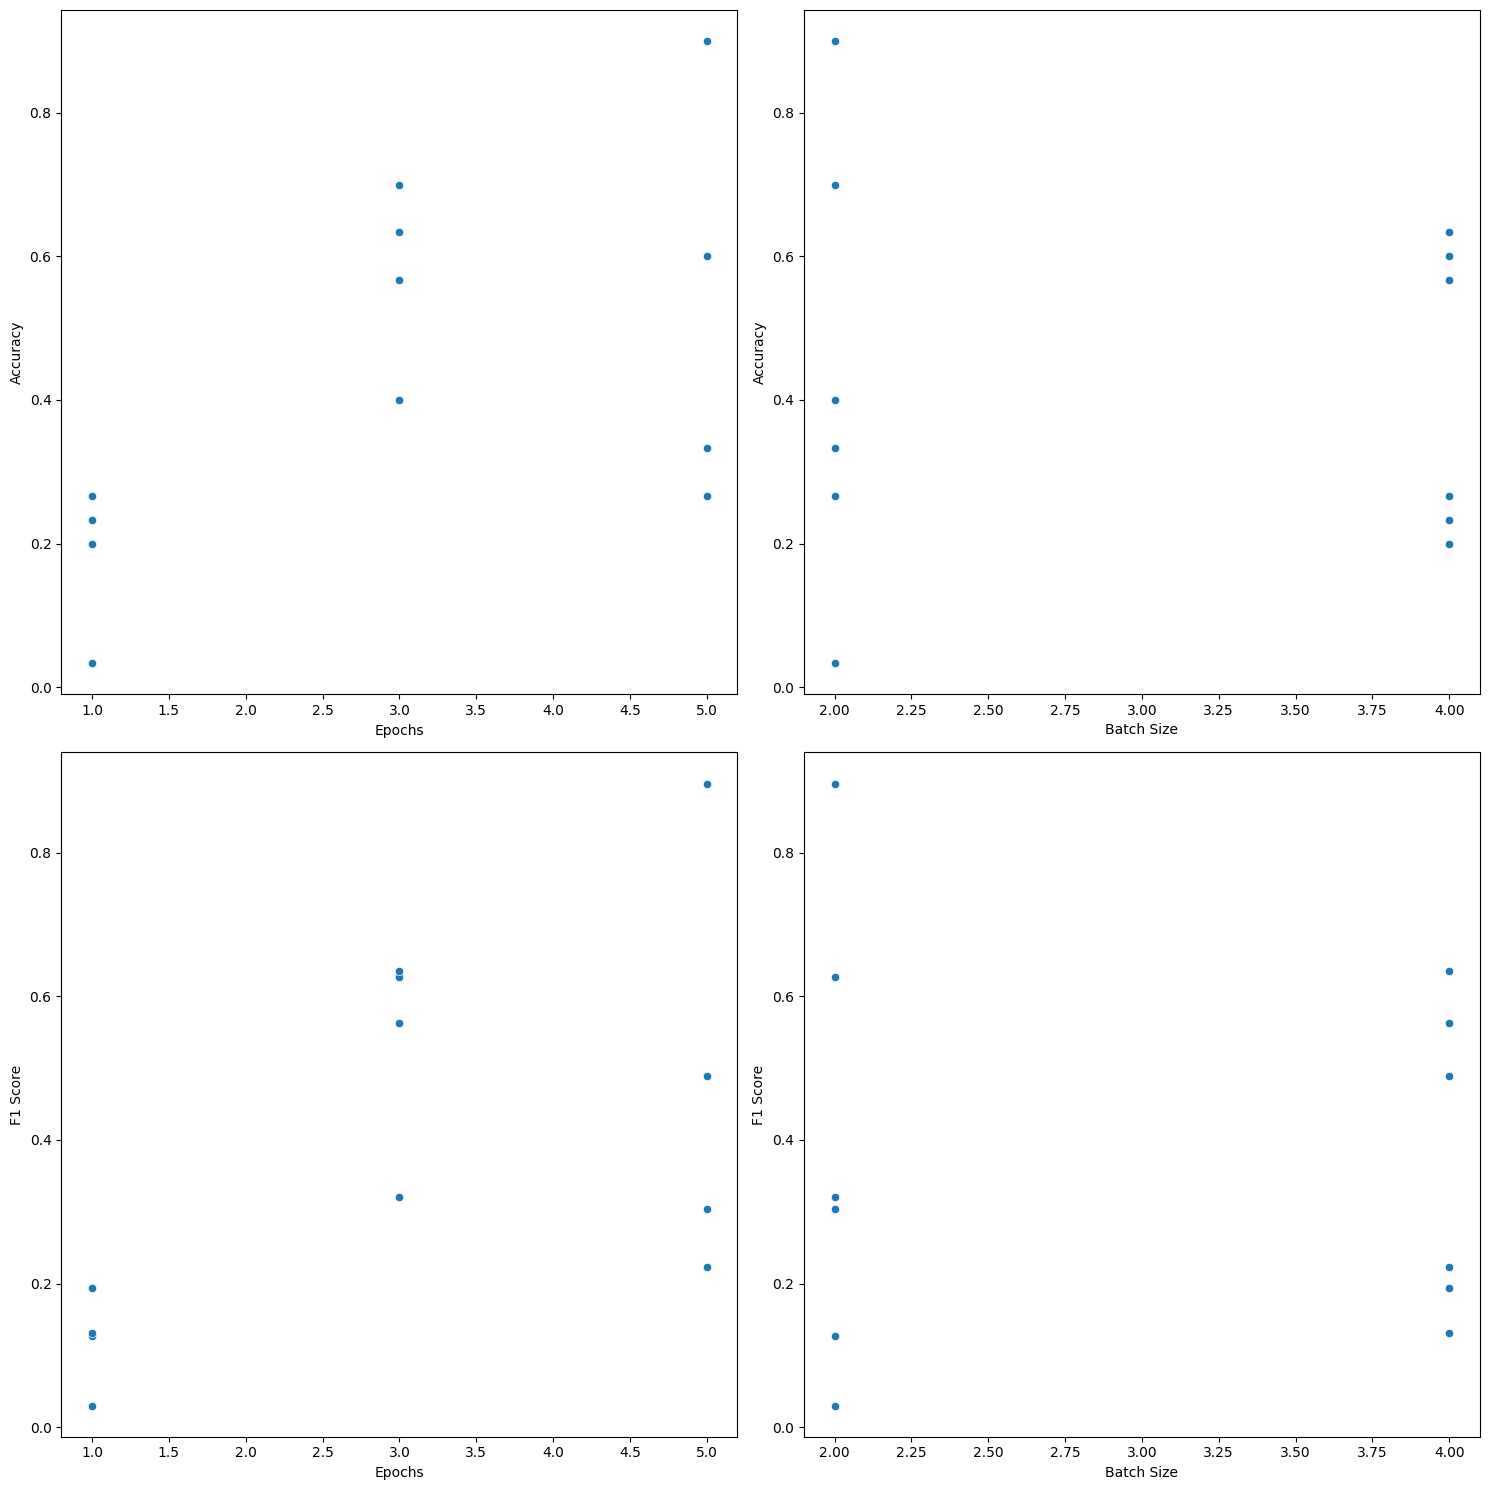

    Batch Size  Learning Rate  Epochs  Accuracy  F1 Score  Training Loss  \
2            2        0.00100       5  0.900000  0.896000       0.584261   
1            2        0.00100       3  0.700000  0.626452       0.746044   
7            4        0.00100       3  0.633333  0.635274       0.836739   
8            4        0.00100       5  0.600000  0.488889       0.809490   
10           4        0.00001       3  0.566667  0.563389       0.977294   
4            2        0.00001       3  0.400000  0.320959       1.247257   
5            2        0.00001       5  0.333333  0.303216       1.017921   
0            2        0.00100       1  0.266667  0.126316       1.256644   
11           4        0.00001       5  0.266667  0.223349       1.247275   
6            4        0.00100       1  0.233333  0.131250       1.570113   
9            4        0.00001       1  0.200000  0.194048       1.236503   
3            2        0.00001       1  0.033333  0.030000       1.190071   

    Validat

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from autogluon.tabular import TabularPredictor

# defining function to train and evaluate the model
def train_and_evaluate(X_train, y_train, X_test, y_test, batch_size, learning_rate, epochs):
    model = Sequential([
        Dense(16, activation='relu', input_shape=(4,)),
        Dense(3, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                        validation_split=0.2, verbose=0)
    
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    
    return accuracy, f1, history

batch_sizes = [2, 4]
learning_rates = [1e-3, 1e-5]
epochs_list = [1, 3, 5]

results = []

# Create a figure for all training vs validation loss plots
fig, axes = plt.subplots(len(batch_sizes), len(learning_rates), figsize=(15, 10))
fig.suptitle('Training vs Validation Loss for Each Configuration')

for i, batch_size in enumerate(batch_sizes):
    for j, lr in enumerate(learning_rates):
        for epochs in epochs_list:
            accuracy, f1, history = train_and_evaluate(X_train_scaled, y_train, X_test_scaled, y_test, batch_size, lr, epochs)
            results.append({
                'Batch Size': batch_size,
                'Learning Rate': lr,
                'Epochs': epochs,
                'Accuracy': accuracy,
                'F1 Score': f1,
                'Training Loss': history.history['loss'][-1],
                'Validation Loss': history.history['val_loss'][-1]
            })
            
            # Plot training vs validation loss
            ax = axes[i, j]
            ax.plot(history.history['loss'], label=f'Train (Epochs: {epochs})')
            ax.plot(history.history['val_loss'], label=f'Val (Epochs: {epochs})')
            ax.set_title(f'Batch Size: {batch_size}, LR: {lr}')
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Loss')
            ax.legend()

plt.tight_layout()
plt.show()

df_results = pd.DataFrame(results)

# AutoGluon
train_data = pd.DataFrame(X_train_scaled, columns=[f'feature_{i}' for i in range(X_train_scaled.shape[1])])
train_data['target'] = np.argmax(y_train, axis=1)

predictor = TabularPredictor(label='target').fit(train_data)
autogluon_results = predictor.fit_summary()

# Overall Training vs Validation Loss scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_results['Training Loss'], df_results['Validation Loss'])
plt.xlabel('Training Loss')
plt.ylabel('Validation Loss')
plt.title('Overall Training vs Validation Loss')
plt.show()

# Relationship between hyperparameters and performance
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

sns.scatterplot(data=df_results, x='Epochs', y='Accuracy', ax=axes[0, 0])
sns.scatterplot(data=df_results, x='Batch Size', y='Accuracy', ax=axes[0, 1])
sns.scatterplot(data=df_results, x='Epochs', y='F1 Score', ax=axes[1, 0])
sns.scatterplot(data=df_results, x='Batch Size', y='F1 Score', ax=axes[1, 1])

plt.tight_layout()
plt.show()

# Performance description
print(df_results.sort_values('Accuracy', ascending=False))

# AutoGluon results
print("\nAutoGluon Results:")
print(autogluon_results)
